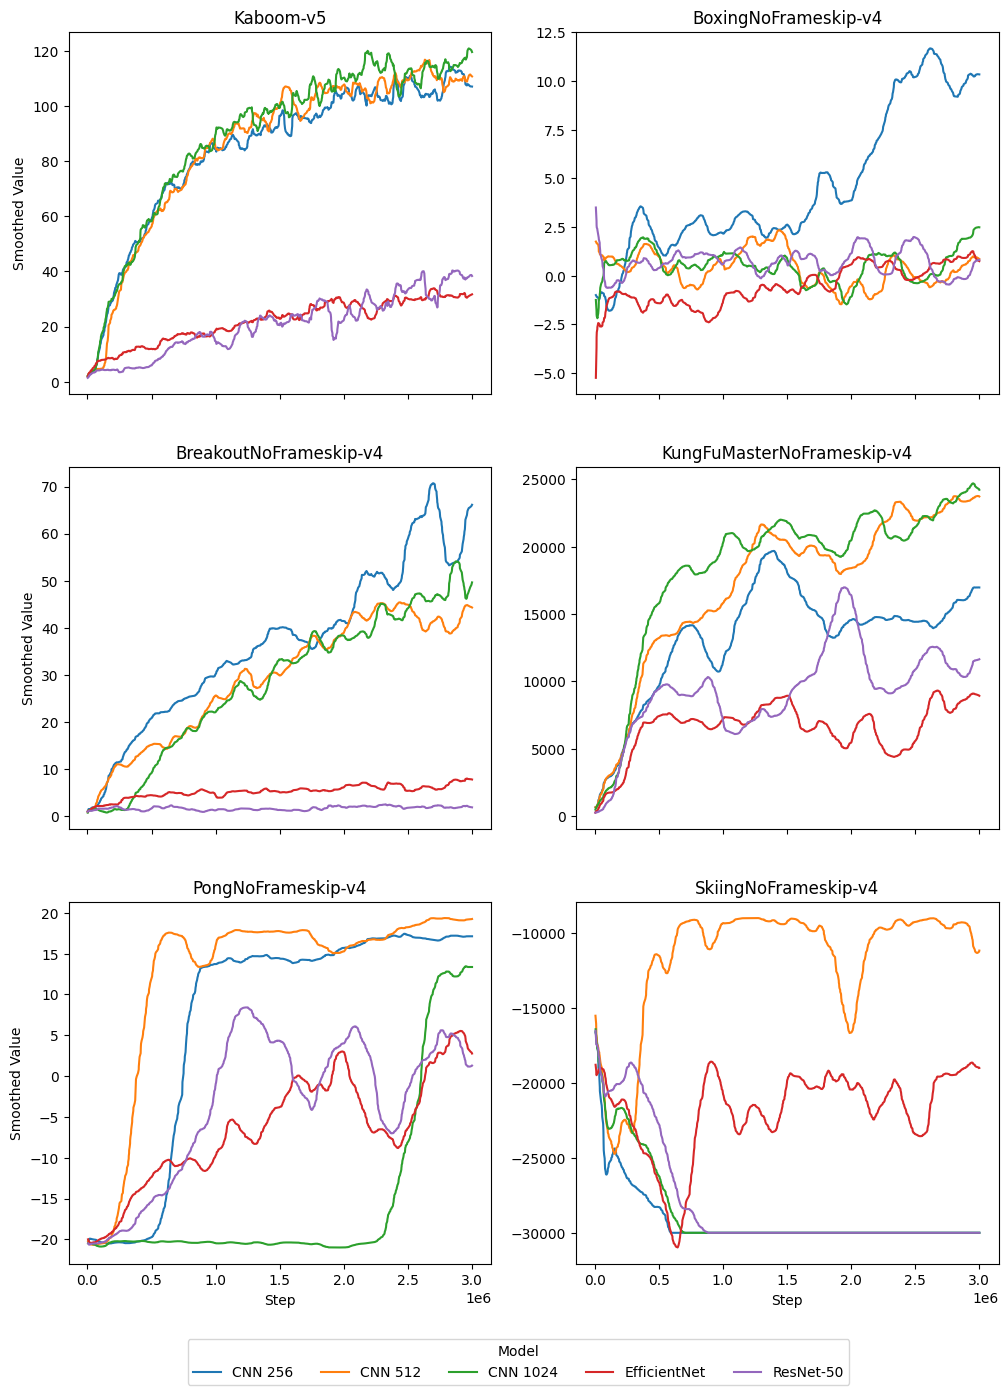

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

envs = ["ALE_Kaboom-v5", "Boxing_BoxingNoFrameskip-v4", "Breakout_BreakoutNoFrameskip-v4", 
        "KungFuMaster_KungFuMasterNoFrameskip-v4", "Pong_PongNoFrameskip-v4", "Skiing_SkiingNoFrameskip-v4"]

figure, axis = plt.subplots(3,2, sharex=True)
figure.set_figwidth(12)
figure.set_figheight(16)

model_names = ['CNN 256', 'CNN 512', 'CNN 1024', 'EfficientNet', 'ResNet-50']
for i, env in enumerate(envs):
    short_env_name = env[env.find('_')+1:]
    df1 = pd.read_csv(f"plots_csvs/{env}_CNN_256_PPO_lr0.00025_netarch[128,_128]_batchsize128_timesteps3000000_1.csv")
    df2 = pd.read_csv(f"plots_csvs/{env}_CNN_512_PPO_lr0.00025_netarch[128,_128]_batchsize128_timesteps3000000_1.csv")
    df3 = pd.read_csv(f"plots_csvs/{env}_CNN_1024_PPO_lr0.00025_netarch[128,_128]_batchsize128_timesteps3000000_1.csv")
    df4 = pd.read_csv(f"plots_csvs/{env}_efficientnet_1280__PPO_lr0.00025_netarch[128,_128]_batchsize128_timesteps3000000_1.csv")
    df5 = pd.read_csv(f"plots_csvs/{env}_resnet50_2048__PPO_lr0.00025_netarch[128,_128]_batchsize128_timesteps3000000_1.csv")
    
    # Add a column to differentiate between the files
    df1['File'] = 'CNN 256'
    df2['File'] = 'CNN 512'
    df3['File'] = 'CNN 1024'
    df4['File'] = 'EfficientNet'
    df5['File'] = 'ResNet-50'
    
    # Concatenate the DataFrames
    df = pd.concat([df1, df2, df3, df4, df5])
    
    # Apply a rolling window to smooth the data over 10 data points
    window_size = 20
    df['Rolling Min'] = df.groupby('File')['Value'].transform(lambda x: x.rolling(window=window_size, min_periods=1).min())
    df['Rolling Max'] = df.groupby('File')['Value'].transform(lambda x: x.rolling(window=window_size, min_periods=1).max())
    df['Smoothed Value'] = df.groupby('File')['Value'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
    
    # Plotting using seaborn
    #plt.figure(figsize=(12, 6))
    #ax = plt.gca()
    ax = sns.lineplot(data=df, x='Step', y='Smoothed Value', hue='File', style='File', dashes=False, ax=axis[i//2, i%2], legend=False)
    colors = [l.get_c() for l in ax.get_lines()]
    lines = ax.get_lines()
    
    axis[i//2, i%2].set_title(short_env_name)
    if i%2 == 1:
        axis[i//2, i%2].set_ylabel('')
    #plt.xlabel('Timestep')
    #plt.ylabel('Average reward per epoch')
    #plt.grid(True)
    #plt.legend(title='Model:')
    #ax.set_xlim(0, 3e6)
    
    hyperparameters_text = """
    Hyperparameters:
    - Hidden Units: 128, 128
    - Entropy coefficient = 0.01
    - Clip range: 0.1
    - Learning Rate: 2.5e-4
    - Mini batches: 128
    - Number of envs: 4
    - Updates: ?
    """
    #plt.figtext(0.92, 0.25, hyperparameters_text, wrap=True, verticalalignment='center', fontsize=10)
    #plt.savefig(f"plots/{short_env_name}.pdf", format="pdf", bbox_inches="tight")
figure.legend(handles=lines, labels=model_names, ncol=5, loc='lower center', bbox_to_anchor=(0.5, 0.03),
             title='Model')
plt.savefig(f"plots/all_plots_tight.png", bbox_inches="tight")
plt.savefig(f"plots/all_plots_tight.pdf", format='pdf', bbox_inches="tight")
plt.show()
